In [ ]:
import sys, os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Reading the position of all atoms of S8 and GSH molecules
directories = ["1", "2", "3", "4", "5", "6"]
allZpos_gsh = []

## 6 gsh
savedir = ".../results/"
for dir in directories:
    gsh6_Zdata = np.load(savedir + dir + '-allatom-gsh-Z.npy')
    time_6gsh  = gsh6_Zdata[:, 0]
    atoms_6gsh = gsh6_Zdata[:, 1:]
    allZpos_gsh.append(atoms_6gsh)

## 10 gsh
savedir = ".../results/"
for dir in directories:
    gsh10_Zdata = np.load(savedir + dir + '-allatom-gsh-Z.npy')
    time_10gsh  = gsh10_Zdata[:, 0]
    atoms_10gsh = gsh10_Zdata[:, 1:]
    allZpos_gsh.append(atoms_10gsh)

gsh_allatoms_Z = np.hstack(allZpos_gsh) 
print(f"GSH: Shape of combined Z-positions matrix: {gsh_allatoms_Z.shape}")

#########################################
# s8
allZpos_s8 = []
## one S8
savedir = ".../results/"
for dir in directories:
    one_S8mol = np.load(savedir + dir + '-allatom-S8-Z.npy')
    # print(f"Data shape: {one_S8mol.shape}")
    time_s8  = one_S8mol[:, 0]
    atoms_s8 = one_S8mol[:, 1:]
    allZpos_s8.append(atoms_s8)

## three S8
savedir = ".../results/"
for dir in directories:
    three_S8mol = np.load(savedir + dir + '-allatom-S8-Z.npy')
    # print(f"Data shape: {three_S8mol.shape}")
    time_s8  = three_S8mol[:, 0]
    atoms_s8 = three_S8mol[:, 1:]
    allZpos_s8.append(atoms_s8)

## six S8
savedir = ".../results/"
for dir in directories:
    six_S8mol = np.load(savedir + dir + '-allatom-S8-Z.npy')
    # print(f"Data shape: {six_S8mol.shape}")
    time_s8  = six_S8mol[:, 0]
    atoms_s8 = six_S8mol[:, 1:]
    allZpos_s8.append(atoms_s8)

s8_allatoms_Z = np.hstack(allZpos_s8) 
print(f"S8: Shape of combined Z-positions matrix: {s8_allatoms_Z.shape}")

GSH: Shape of combined Z-positions matrix: (4001, 3552)
3552
S8: Shape of combined Z-positions matrix: (3002, 480)
480


In [3]:
S8_second_half_Z  = s8_allatoms_Z[s8_allatoms_Z.shape[0] // 2:, :]
gsh_second_half_Z = gsh_allatoms_Z[gsh_allatoms_Z.shape[0] // 2:, :]

print(np.shape(S8_second_half_Z))
print(np.shape(gsh_second_half_Z))

s8_all_data = S8_second_half_Z.flatten()
gsh_all_data = gsh_second_half_Z.flatten()

print(np.shape(s8_all_data))
print(np.shape(gsh_all_data))

center = 5.2
s8_all_data = [z - center for z in s8_all_data]
gsh_all_data = [z - center for z in gsh_all_data]

(1501, 480)
(2001, 3552)
(720480,)
(7107552,)


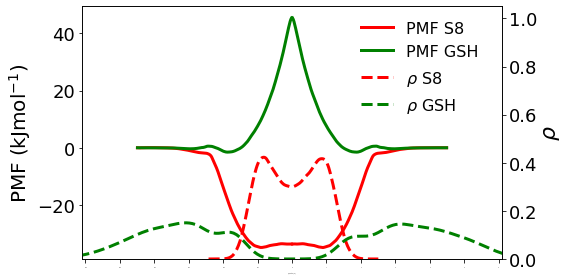

In [ ]:
plt.figure(figsize=(8, 4))

## S8 pmf
mydir = '.../pmf-s8/US_50ns/WHAM/'
os.chdir(mydir)
profiles = ["profile_25000.xvg"]
all_free_energy = []
for i, pro in enumerate(profiles):
    # Load the PMF data
    data = np.loadtxt(pro, comments=['@', '#'])
    reaction_coordinate = data[:, 0]
    free_energy = data[:, 1]
    plt.plot(reaction_coordinate, free_energy, linewidth=3, alpha=1, color='red', label=r'PMF S8')
    mirrored_rc = -reaction_coordinate[::-1] 
    mirrored_fe = free_energy[::-1]          
    plt.plot(mirrored_rc, mirrored_fe, linewidth=3, alpha=1, color='red')

# gsh pmf
mydir = '.../pmf-gsh/US_100ns/WHAM/'
os.chdir(mydir)    
profiles = ["profile_50000.xvg"]
all_free_energy = []
for i, pro in enumerate(profiles):
    # Load the PMF data
    data = np.loadtxt(pro, comments=['@', '#'])
    reaction_coordinate = data[:, 0]
    free_energy = data[:, 1]
    plt.plot(reaction_coordinate, free_energy, linewidth=3, alpha=1, color='green', label=r'PMF GSH')
    mirrored_rc = -reaction_coordinate[::-1] 
    mirrored_fe = free_energy[::-1]          
    plt.plot(mirrored_rc, mirrored_fe, linewidth=3, alpha=1, color='green')


plt.xlabel('Z_position (nm)', fontsize=0)
plt.ylabel(r'PMF (kJmol$^{-1}$)', fontsize=20)
plt.tick_params(axis='y', labelsize=18)
plt.tick_params(axis='x', labelsize=0)
plt.xticks(np.arange(-6, 6.1, 1))
plt.xlim(-6.1, 6.1)
plt.legend(loc='upper left', fontsize=16, frameon=False, bbox_to_anchor=(0.63, 1))

###
ax2 = plt.gca().twinx()
sns.kdeplot(s8_all_data, color='red', label=r'$\rho$ S8', linestyle='--', linewidth=3, ax=ax2)
sns.kdeplot(gsh_all_data, color='green', label=r'$\rho$ GSH', linestyle='--', linewidth=3, ax=ax2)
# #
ax2.set_ylabel(r'$\rho$', fontsize=22)
ax2.set_xlabel('', fontsize=0)
ax2.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='x', labelsize=0)
ax2.set_ylim(0, 1.05) 
plt.legend(loc='upper left', fontsize=16, frameon=False, bbox_to_anchor=(0.63, 0.81))

plt.tight_layout()
plt.show()

# plt.savefig("/hits/fast/mbm/boushesr/OctaSulfur-S8/membrane-simulations/S8_gsh_eqMD_Zpopc_hist.pdf", bbox_inches='tight', transparent=True)
# plt.savefig("/hits/fast/mbm/boushesr/OctaSulfur-S8/membrane-simulations/S8_gsh_eqMD_Zpopc_hist.svg", bbox_inches='tight', transparent=True)

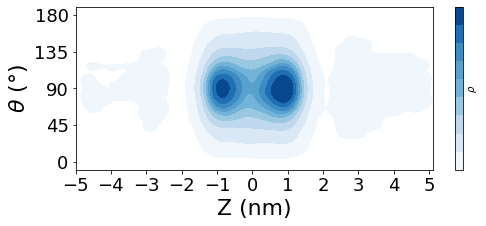

In [ ]:
com_array = []
angle_array = []

savedir = ".../1molecule/results/"
for dir in ["1", "2", "3", "4", "5", "6"]:
    for mol in range(1, 2):
        #first
        filename = f"{savedir}{dir}_first_orient_S8_mol{mol}.npy"
        data = np.load(filename)
        com = data[:, 1]
        angles = data[:, 2]
        com_array.append(com[:]/10)
        angle_array.append(angles)
        #second
        filename = f"{savedir}{dir}_second_orient_S8_mol{mol}.npy"
        data = np.load(filename)
        com = data[:, 1]
        angles = data[:, 2]
        com_array.append(com[:]/10)
        angle_array.append(angles)

savedir = ".../3molecule/results/"
for dir in ["1", "2", "3", "4", "5", "6"]:
    for mol in range(1, 4):
        #first
        filename = f"{savedir}{dir}_first_orient_S8_mol{mol}.npy"
        data = np.load(filename)
        com = data[:, 1]
        angles = data[:, 2]
        com_array.append(com[:]/10)
        angle_array.append(angles)
        #second
        filename = f"{savedir}{dir}_second_orient_S8_mol{mol}.npy"
        data = np.load(filename)
        com = data[:, 1]
        angles = data[:, 2]
        com_array.append(com[:]/10)
        angle_array.append(angles)
                
savedir = ".../6molecule/results/"
for dir in ["1", "2", "3", "4", "5", "6"]:
    for mol in range(1, 7):
        #first
        filename = f"{savedir}{dir}_first_orient_S8_mol{mol}.npy"
        data = np.load(filename)
        com = data[:, 1]
        angles = data[:, 2]
        com_array.append(com[:]/10)
        angle_array.append(angles)
        #second
        filename = f"{savedir}{dir}_second_orient_S8_mol{mol}.npy"
        data = np.load(filename)
        com = data[:, 1]
        angles = data[:, 2]
        com_array.append(com[:]/10)
        angle_array.append(angles)


# Shift all your data
com_array = np.concatenate(com_array)
angle_array = np.concatenate(angle_array)

center = 5.2
com_array = [z - center for z in com_array]

plt.figure(figsize=(8, 3))

kde = sns.kdeplot(
    x=com_array, 
    y=angle_array, 
    fill=True, 
    cmap="Blues",
    cbar=True,  # Add the colorbar
    cbar_kws={
        'label': r'$\rho$',
        'shrink': 1,
        'ticks': [0, 0.25, 0.5, 0.75, 1.0],  # Add fewer ticks for clarity
    }
)

plt.xlabel('Z (nm)', fontsize=22)
plt.ylabel(r'$\theta$ ($\degree$)', fontsize=22)
plt.tick_params(axis='both', labelsize=18)
plt.yticks(np.arange(0, 190, 45))
plt.xticks(np.arange(-5., 5.1, 1))
plt.ylim(-10, 190)
plt.xlim(-5., 5.1)

# plt.show()

plt.savefig(".../S8_orient_hist-LEGEND.pdf", bbox_inches='tight', transparent=True)
# plt.savefig("/hits/fast/mbm/boushesr/OctaSulfur-S8/membrane-simulations/S8_orient_hist.svg", bbox_inches='tight', transparent=True)